In [11]:
import numpy as np
import matplotlib.pyplot as plt

##  ================== Part 1: Load Example Dataset  ===================
  We start this exercise by using a small dataset that is easy to
  visualize.

  Our example case consists of 2 network server statistics across
  several machines: the latency and throughput of each machine.
  This exercise will help us find possibly faulty (or very fast) machines.

In [2]:
print('Visualizing example dataset for outlier detection.')

Visualizing example dataset for outlier detection.


In [3]:
import scipy.io
mat = scipy.io.loadmat('./data/ex8data1.mat')

In [7]:
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

Visualize the example dataset

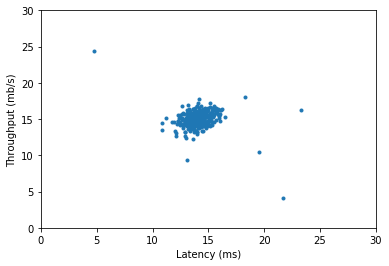

In [15]:
plt.plot(X[:,0],X[:,1],'.')
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

## ================== Part 2: Estimate the dataset statistics ===================
  For this exercise, we assume a Gaussian distribution for the dataset.

  We first estimate the parameters of our assumed Gaussian distribution, 
  then compute the probabilities for each of the points and then visualize 
  both the overall distribution and where each of the points falls in 
  terms of that distribution.


In [169]:
from scipy.stats import multivariate_normal
def estimategaussian(X):
    '''ESTIMATEGAUSSIAN This function estimates the parameters of a 
       Gaussian distribution using the data in X
       estimateGaussian(X), 
       The input X is the dataset with each n-dimensional data point in one row
       The output is an n-dimensional vector mu, the mean of the data set
       and the variances sigma^2, an n x 1 vector'''
    # You should return these values correctly
    mu = np.mean(X,axis=0)
    sigma2 = np.var(X,axis=0)
    return mu, sigma2

def multivariateGaussian(X,mu,sigma2):
    '''MULTIVARIATEGAUSSIAN Computes the probability density function of the
    multivariate gaussian distribution.'''
    var = multivariate_normal(mean=mu, cov=np.diag(sigma2))
    pdf = var.pdf(X)
    return pdf

def visualize_fit(X, mu, sigma2):
    x = np.linspace(0, 30, 50)
    y = np.linspace(0, 30, 50)

    temp1, temp2 = np.meshgrid(x, y)
    Z = multivariateGaussian(np.dstack((temp1,temp2)),mu,sigma2)
    plt.figure(figsize=(8,8))
    plt.plot(X[:,0],X[:,1],'+')
    plt.contour(temp1, temp2, Z,levels=[10**-20 ,10**-17,10**-14,10**-11,10**-8,10**-5,10**-2])
    plt.xlim(0,30)
    plt.ylim(0,30)
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)');
    

In [72]:
mu, sigma2 = estimategaussian(X)
prob = multivariateGaussian(X,mu,sigma2)

Visualizing Gaussian fit.

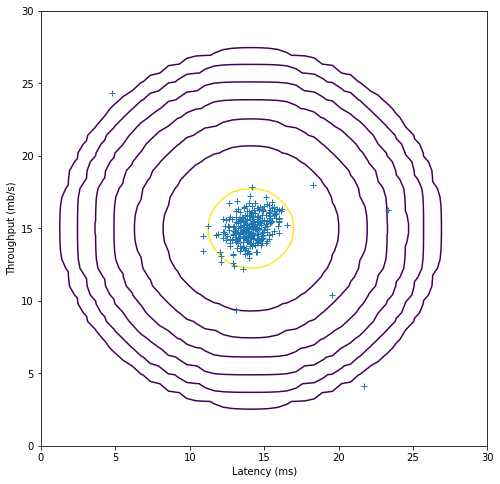

In [170]:
visualize_fit(X, mu, sigma2)

## ================== Part 3: Find Outliers ===================
  Now you will find a good epsilon threshold using a cross-validation set
  probabilities given the estimated Gaussian distribution 

In [143]:
def selectThreshold(yval, pval):
    '''%SELECTTHRESHOLD Find the best threshold (epsilon) to use for selecting outliers
   bestEpsilon, bestF1 = SELECTTHRESHOLD(yval, pval) finds the best
   threshold to use for selecting outliers based on the results from a
   validation set (pval) and the ground truth (yval).
    '''
    bestF1 = 0
    stepsize = (np.max(pval) - np.min(pval)) / 1000
    for epsilon in np.arange(np.min(pval),np.max(pval),stepsize):
        predictions = (pval< epsilon)
        tp = np.sum( (predictions == 1) & ( yval.flatten() == 1) )
        fp = np.sum( (predictions == 1) & ( yval.flatten() == 0) )
        fn = np.sum( (predictions == 0) & ( yval.flatten() == 1) )
        
        if ( (tp + fp) == 0 ):
            prec = 0
        else:
            prec = tp / ( tp + fp)
        
        if ( (tp + fn) == 0 ):
            rec = 0
        else:
            rec = tp / ( tp + fn)
            
        if ((prec + rec) == 0 ):
            F1 = 0
        else:
            F1 = 2*prec*rec / ( prec + rec )
        
        if (F1 > bestF1):
            bestF1 = F1
            bestEpsilon = epsilon
    
    return bestEpsilon, bestF1

In [111]:
pval = multivariateGaussian(Xval, mu, sigma2);

In [146]:
epsilon,F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on Cross Validation Set:  {}'.format(F1))
print('   (you should see a value epsilon of about 8.99e-05)')
print('   (you should see a Best F1 value of  0.875000)')

Best epsilon found using cross-validation: 8.990852779269493e-05
Best F1 on Cross Validation Set:  0.8750000000000001
   (you should see a value epsilon of about 8.99e-05)
   (you should see a Best F1 value of  0.875000)


Find the outliers in the training set and plot the

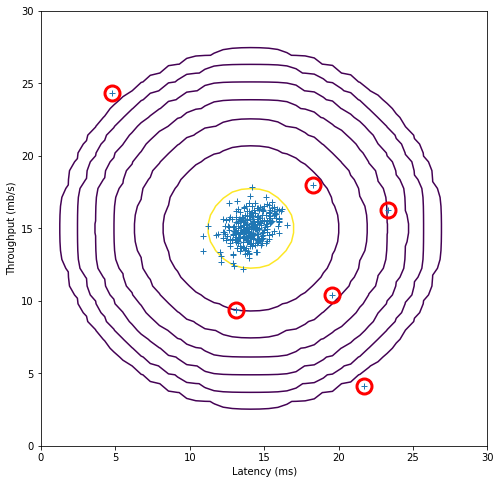

In [172]:
outliers = (prob < epsilon)
visualize_fit(X, mu, sigma2)
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', fillstyle='none',markersize=15,markeredgewidth=3 );

## ================== Part 4: Multidimensional Outliers ===================
  We will now use the code from the previous part and apply it to a 
  harder problem in which more features describe each datapoint and only 
  some features indicate whether a point is an outlier.


  Loads the second dataset. You should now have the
  variables X, Xval, yval in your environment

In [173]:
mat = scipy.io.loadmat('./data/ex8data2.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

Apply the same steps to the larger dataset

In [175]:
mu, sigma2 = estimategaussian(X)

Training set

In [176]:
prob = multivariateGaussian(X,mu,sigma2)

Cross-validation set

In [177]:
pval = multivariateGaussian(Xval, mu, sigma2)

Find the best threshold

In [178]:
epsilon, F1 = selectThreshold(yval, pval)

In [180]:
print('Best epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on Cross Validation Set:  {}'.format(F1))
print('   (you should see a value epsilon of about 1.38e-18)')
print('   (you should see a Best F1 value of 0.615385)')
print('# Outliers found: {}'.format( np.sum(prob < epsilon)) )

Best epsilon found using cross-validation: 1.3772288907613604e-18
Best F1 on Cross Validation Set:  0.6153846153846154
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of 0.615385)
# Outliers found: 117
